# Basic Analysis for industrial machine downtime

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this first level, you're going to explore and describe the data. This level is aimed towards beginners. If you want to challenge yourself a bit more, check out level two!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

# Summary
In this analysis, we will see important metrics that we help us to understanding why machines was downtime. This metric is the basis for the other level of analysis or making recommendation more specific.

## Date of Readings
The provide data show us that was taken by over a year, which the first date of reading was **2021-11-24** and the last reading **2022-07-03**. It seems enough data to try get insigths.

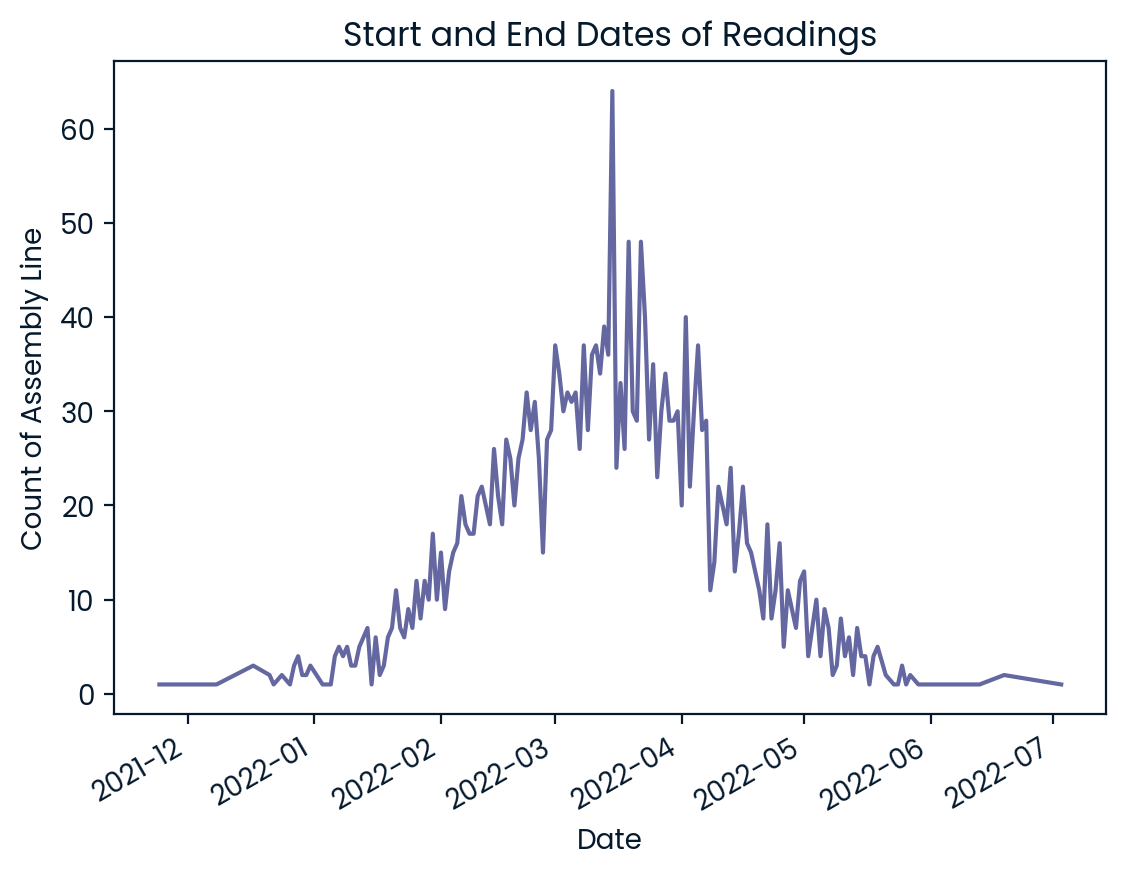

In [51]:
# First day and last day
downtime['date_1'] = pd.to_datetime(downtime['Date'])
#print(downtime['date_1'].min(), downtime['date_1'].max())
downtime_assembly = downtime.groupby('date_1')['Assembly_Line_No'].count()
downtime_assembly.plot(kind='line')
plt.title('Start and End Dates of Readings')
plt.xlabel('Date')
plt.ylabel('Count of Assembly Line')
plt.show()

## Average of Torque
The next graphic show us the distribution of Torque. We can see that most data is concentred between value 20 and 30, which its average is roughly **25** Nm. This information we can help us to identify what machines was downtime if his torque is below or above of average.

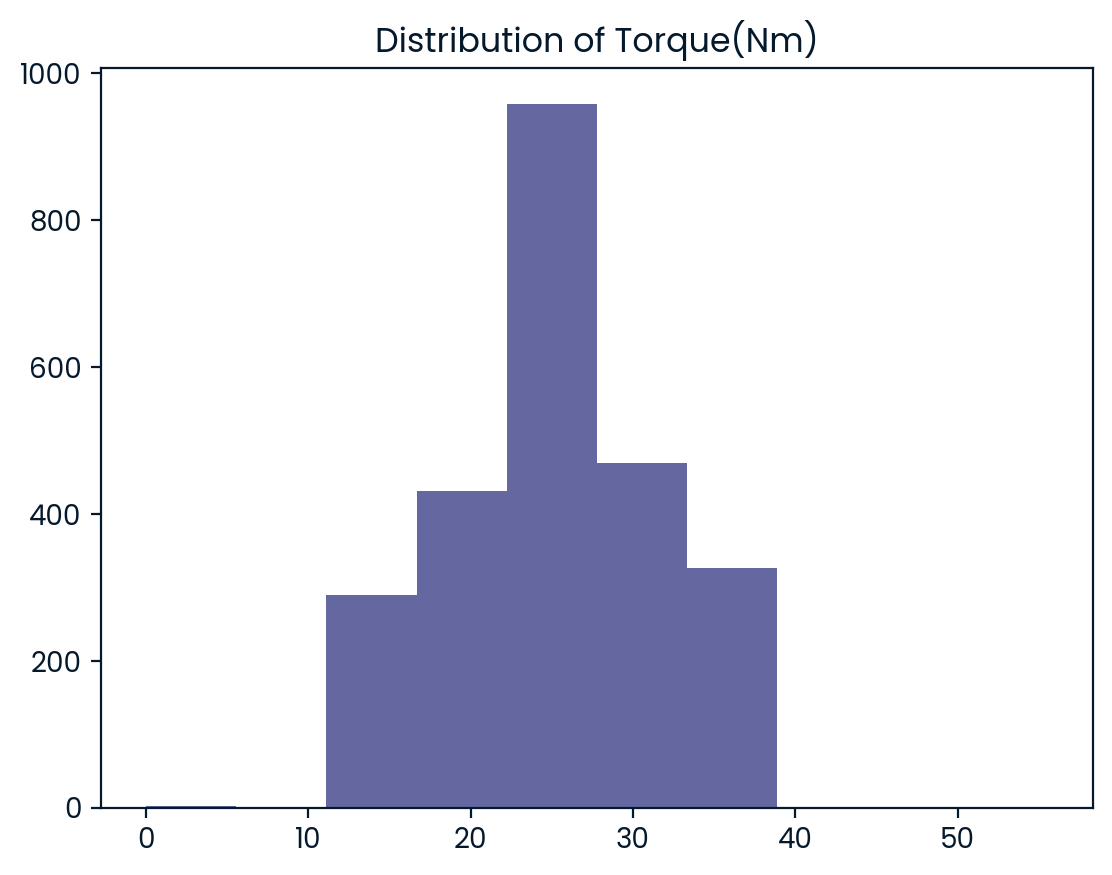

In [52]:
avg_torque = downtime['Torque(Nm)'].mean().round(2)
#print(avg_torque)

plt.hist(downtime['Torque(Nm)'], bins=10)
plt.title('Distribution of Torque(Nm)')
plt.show()

# Machine Downtime Counts by Assembly Line
In this last part,  we can see the assembly line **L1** was the most downtime than others one.

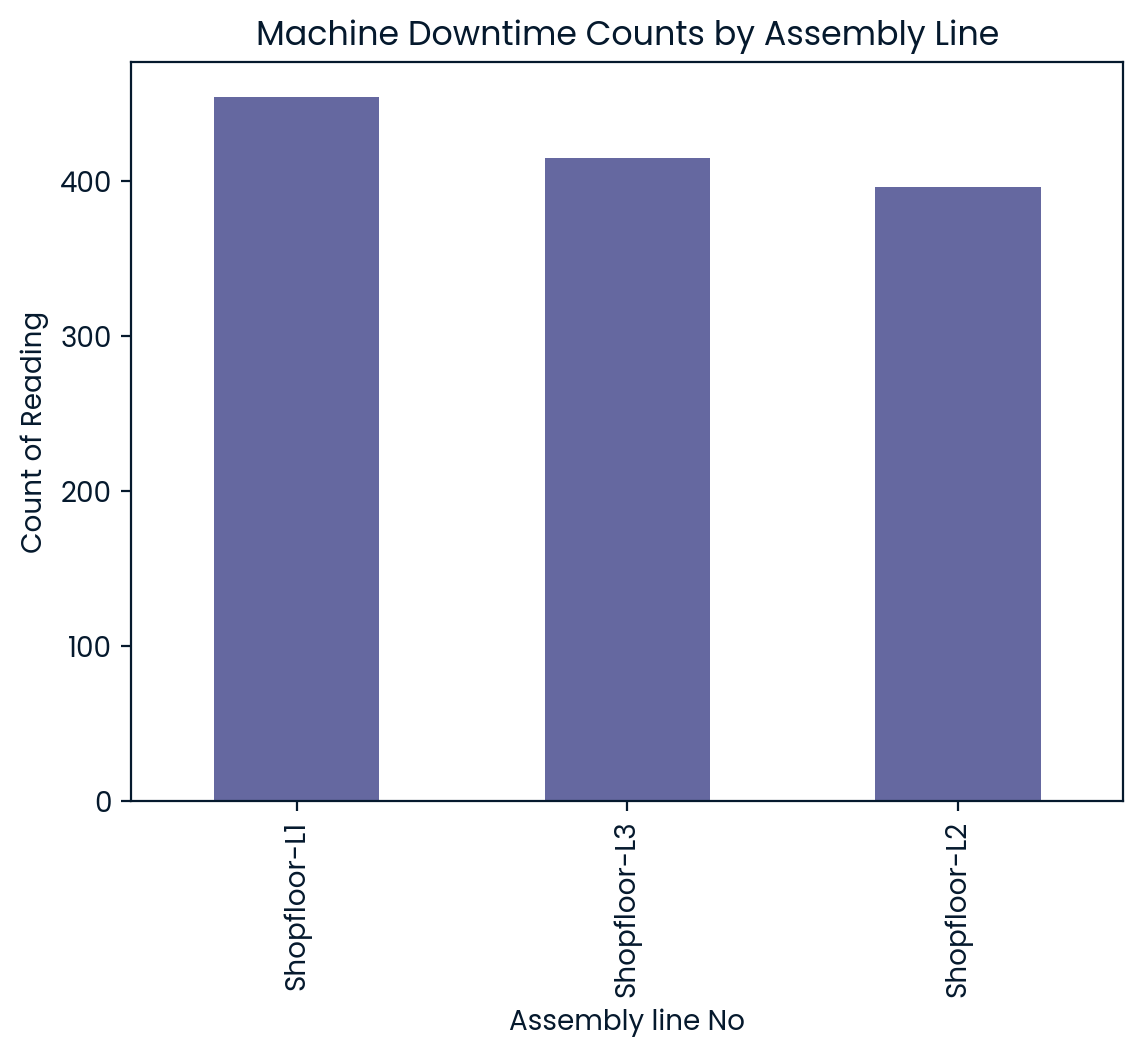

In [53]:
assembly_line_group = downtime[downtime['Downtime']=='Machine_Failure'].groupby('Assembly_Line_No')['Assembly_Line_No'].count().sort_values(ascending=False)
assembly_line_group.plot(kind='bar', title='Machine Downtime Counts by Assembly Line')
plt.ylabel('Count of Reading')
plt.xlabel('Assembly line No')
plt.show()